In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import joblib

In [3]:
# Read saved csv files
TrainVal        = pd.read_csv('01train.csv')
TrainVal_scaled = pd.read_csv('01train_scaled.csv').drop('Timestamp', axis=1)

In [4]:
TrainVal_scaled = pd.read_csv('01train_scaled.csv').drop(['Timestamp','Unnamed: 0'], axis=1)
Test_scaled     = pd.read_csv('01test_scaled.csv').drop(['Timestamp','Unnamed: 0'], axis=1)

In [5]:
# Create a date range for the specified interval using 5min fequency (as per the dataset)
date_range = pd.date_range('2019-03-01 00:00', '2019-06-16 23:59', freq='5Min')
myser = pd.Series(data=date_range)

In [6]:
date_range1 = pd.date_range('2019-06-10 00:00', '2019-06-16 23:59', freq='5Min')
myser1 = pd.Series(data=date_range1, name='Timestamp')

In [7]:
TrainVal['Unnamed: 0'] = myser
TrainVal.rename(columns={'Unnamed: 0': 'Timestamp'}, inplace=True)

In [8]:
TrainVal_scaled['Unnamed: 0'] = myser
TrainVal_scaled.rename(columns={'Unnamed: 0': 'Timestamp'}, inplace=True)

In [9]:
TrainVal

,Timestamp,f1,f2,f3,f4,f5,f6,f7
0,2019-03-01 00:00:00,104.0,98.0,132.0,125.0,128.0,38.0,45.0
1,2019-03-01 00:05:00,100.0,95.0,135.0,125.0,119.0,72.0,77.0
2,2019-03-01 00:10:00,110.0,124.0,132.0,112.0,118.0,73.0,73.0
3,2019-03-01 00:15:00,110.0,102.0,103.0,100.0,106.0,88.0,90.0
4,2019-03-01 00:20:00,101.0,98.0,117.0,114.0,109.0,66.0,62.0
...,...,...,...,...,...,...,...,...
31099,2019-06-16 23:35:00,148.0,143.0,163.0,137.0,166.0,114.0,91.0
31100,2019-06-16 23:40:00,197.0,207.0,200.0,147.0,184.0,109.0,94.0
31101,2019-06-16 23:45:00,138.0,159.0,174.0,138.0,167.0,128.0,120.0
31102,2019-06-16 23:50:00,136.0,140.0,188.0,127.0,144.0,90.0,86.0


In [10]:
TrainVal_scaled

,f1,f2,f3,f4,f5,f6,f7,Timestamp
0,0.200445,0.161943,0.230189,0.265957,0.190395,0.060606,0.084783,2019-03-01 00:00:00
1,0.191537,0.155870,0.235849,0.265957,0.174957,0.125000,0.154348,2019-03-01 00:05:00
2,0.213808,0.214575,0.230189,0.238298,0.173242,0.126894,0.145652,2019-03-01 00:10:00
3,0.213808,0.170040,0.175472,0.212766,0.152659,0.155303,0.182609,2019-03-01 00:15:00
4,0.193764,0.161943,0.201887,0.242553,0.157804,0.113636,0.121739,2019-03-01 00:20:00
...,...,...,...,...,...,...,...,...
31099,0.298441,0.253036,0.288679,0.291489,0.255575,0.204545,0.184783,2019-06-16 23:35:00
31100,0.407572,0.382591,0.358491,0.312766,0.286449,0.195076,0.191304,2019-06-16 23:40:00
31101,0.276169,0.285425,0.309434,0.293617,0.257290,0.231061,0.247826,2019-06-16 23:45:00
31102,0.271715,0.246964,0.335849,0.270213,0.217839,0.159091,0.173913,2019-06-16 23:50:00


# UnScaled

#### Groupby day of week, hour, and minute (5min interval)

In [11]:
df = TrainVal.groupby([TrainVal['Timestamp'].dt.weekday,TrainVal['Timestamp'].dt.hour,
                       TrainVal['Timestamp'].dt.minute])

In [12]:
mean  = df.mean()['f5'].values
std   = df.std()['f5'].values
min_  = df.min()['f5'].values
max_  = df.max()['f5'].values
_25p  = df.quantile(.25)['f5'].values
_50p  = df.quantile(.50)['f5'].values
_75p  = df.quantile(.75)['f5'].values

In [13]:
d = {'Day': myser1.dt.day_name(), 'Timestamp': myser1.dt.time, 'mean': mean, 
     'std': std, 'min': min_, 'max': max_, '25%': _25p, '50%': _50p, '75%': _75p}

In [14]:
df = pd.DataFrame(data = d)

In [15]:
df

,Day,Timestamp,mean,std,min,max,25%,50%,75%
0,Monday,00:00:00,92.333333,14.612454,68.0,119.0,83.00,93.0,101.50
1,Monday,00:05:00,97.800000,10.705139,84.0,118.0,89.00,95.0,106.00
2,Monday,00:10:00,93.533333,18.399793,53.0,137.0,85.50,95.0,98.50
3,Monday,00:15:00,91.600000,14.120906,80.0,139.0,84.50,89.0,92.50
4,Monday,00:20:00,84.800000,12.700956,70.0,108.0,74.50,83.0,93.00
...,...,...,...,...,...,...,...,...,...
2011,Sunday,23:35:00,122.500000,22.057501,90.0,166.0,105.25,122.0,132.50
2012,Sunday,23:40:00,131.750000,22.563983,93.0,184.0,124.50,132.0,143.25
2013,Sunday,23:45:00,114.437500,21.288397,83.0,167.0,101.25,110.0,131.00
2014,Sunday,23:50:00,115.312500,12.830790,85.0,144.0,108.00,114.5,125.00


#### Plot error bar for Monday (value = mean and error = std)

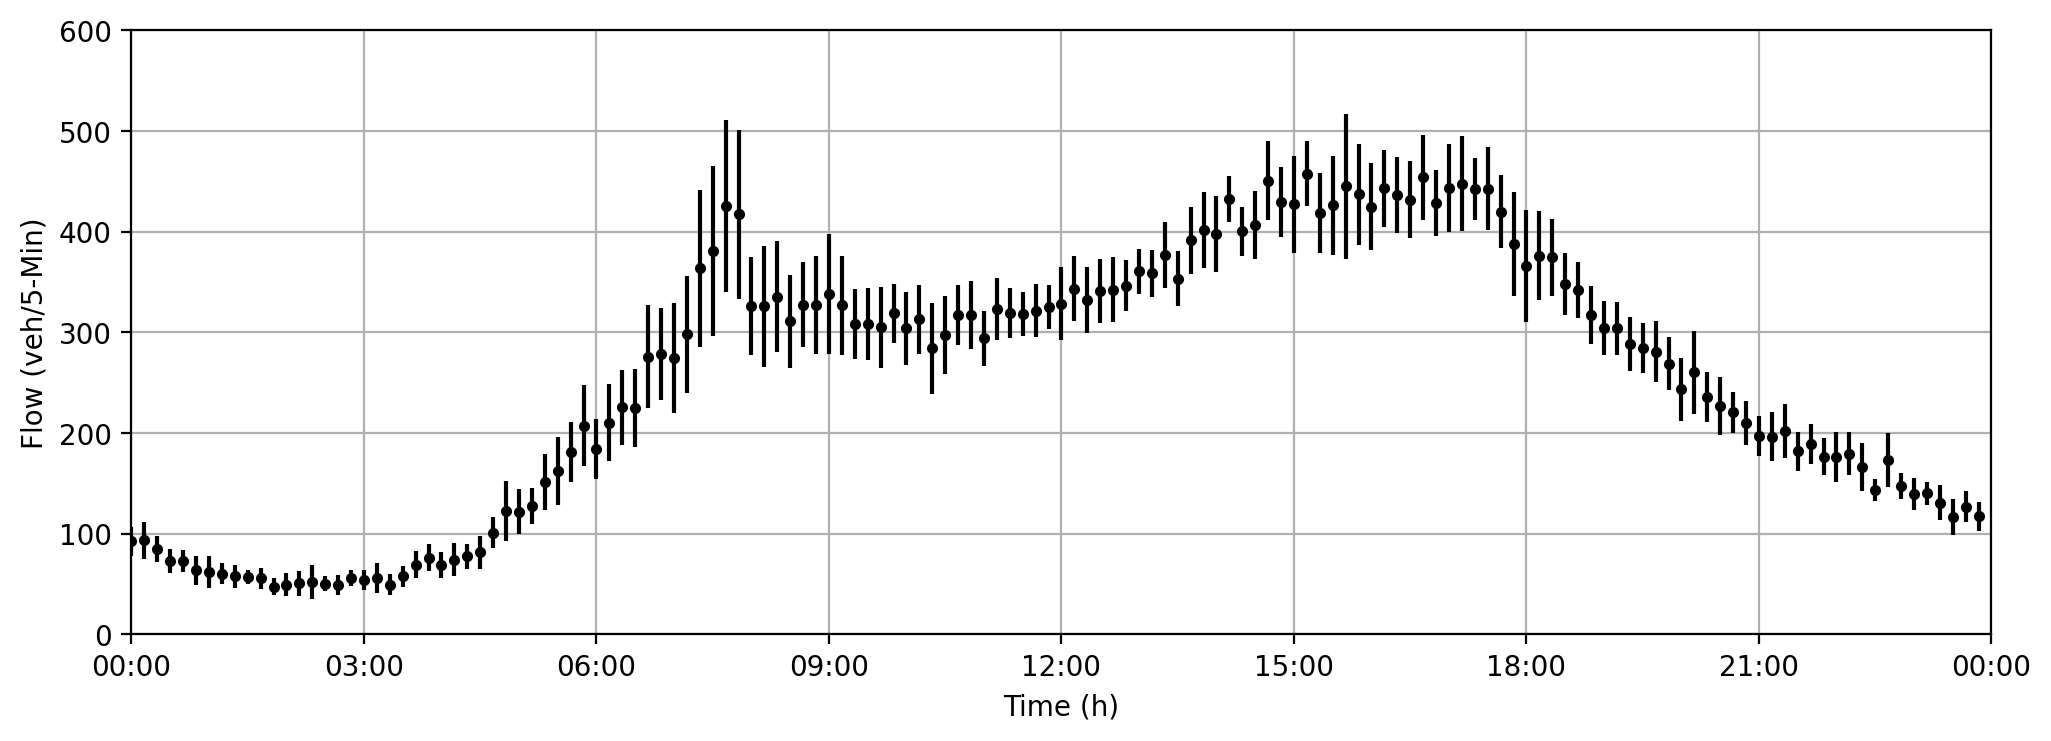

In [16]:
plt.figure(figsize=(12,4), dpi=200)
plt.errorbar(df.loc[0:287:2].index, df.loc[0:287:2]['mean'], yerr=df.loc[0:287:2]['std'], fmt='.k');
plt.xticks([0, 36, 72, 108, 144, 180, 216, 252, 288], 
           ['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00']);
plt.xlim(0,288);
plt.ylim(0,600);
plt.xlabel('Time (h)');
plt.ylabel('Flow (veh/5-Min)');
plt.grid();

# Scaled

#### Groupby day of week, hour, and minute (5min interval)

In [17]:
df1 = TrainVal_scaled.groupby([TrainVal_scaled['Timestamp'].dt.weekday, TrainVal_scaled['Timestamp'].dt.hour,
                       TrainVal_scaled['Timestamp'].dt.minute])

In [18]:
mean  = df1.mean()['f5'].values
std   = df1.std()['f5'].values
min_  = df1.min()['f5'].values
max_  = df1.max()['f5'].values
_25p  = df1.quantile(.25)['f5'].values
_50p  = df1.quantile(.50)['f5'].values
_75p  = df1.quantile(.75)['f5'].values

In [19]:
d1 = {'Day': myser1.dt.day_name(), 'Timestamp': myser1.dt.time, 'mean': mean, 
     'std': std, 'min': min_, 'max': max_, '25%': _25p, '50%': _50p, '75%': _75p}

In [20]:
df1 = pd.DataFrame(data = d1)

In [21]:
df1

,Day,Timestamp,mean,std,min,max,25%,50%,75%
0,Monday,00:00:00,0.129217,0.025064,0.087479,0.174957,0.113208,0.130360,0.144940
1,Monday,00:05:00,0.138593,0.018362,0.114923,0.173242,0.123499,0.133791,0.152659
2,Monday,00:10:00,0.131275,0.031561,0.061750,0.205832,0.117496,0.133791,0.139794
3,Monday,00:15:00,0.127959,0.024221,0.108062,0.209262,0.115780,0.123499,0.129503
4,Monday,00:20:00,0.116295,0.021786,0.090909,0.156089,0.098628,0.113208,0.130360
...,...,...,...,...,...,...,...,...,...
2011,Sunday,23:35:00,0.180961,0.037834,0.125214,0.255575,0.151372,0.180103,0.198113
2012,Sunday,23:40:00,0.196827,0.038703,0.130360,0.286449,0.184391,0.197256,0.216552
2013,Sunday,23:45:00,0.167131,0.036515,0.113208,0.257290,0.144511,0.159520,0.195540
2014,Sunday,23:50:00,0.168632,0.022008,0.116638,0.217839,0.156089,0.167238,0.185249


#### Plot error bar for Monday (value = mean and error = std)

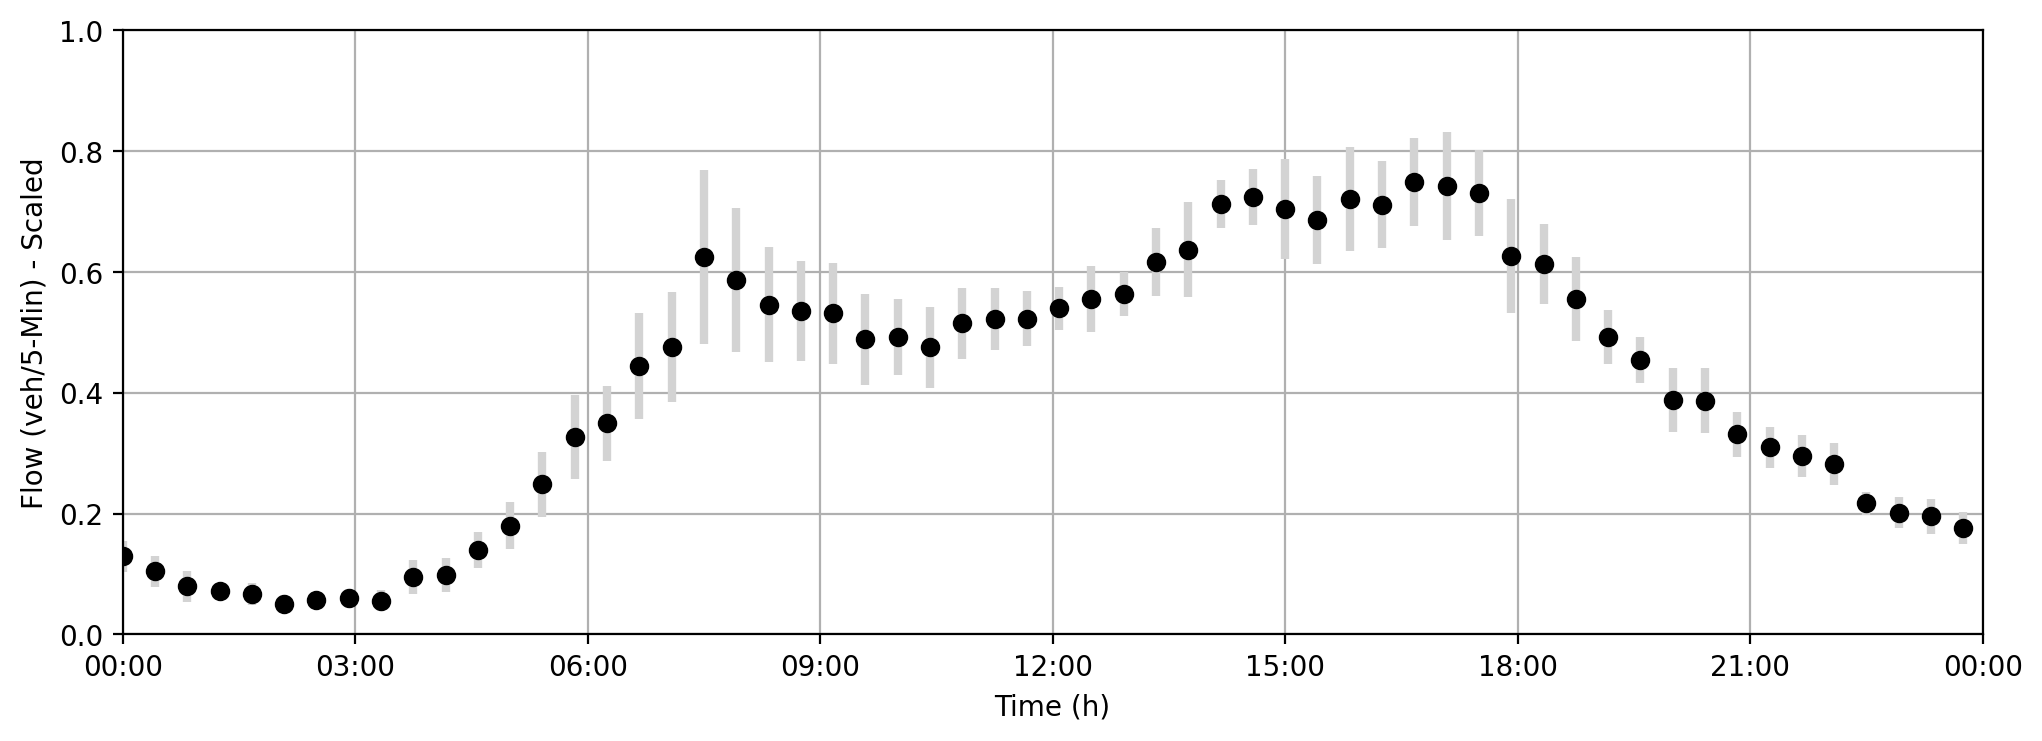

In [22]:
plt.figure(figsize=(12,4), dpi=200)
plt.errorbar(df1.loc[0:287:5].index, df1.loc[0:287:5]['mean'], yerr=df1.loc[0:287:5]['std'], fmt='o', 
             color='black', ecolor='lightgray', elinewidth=3, capsize=0);
plt.xticks([0, 36, 72, 108, 144, 180, 216, 252, 288], 
           ['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00']);
plt.xlim(0,288);
plt.ylim(0,1);
plt.xlabel('Time (h)')
plt.ylabel('Flow (veh/5-Min) - Scaled')
plt.grid();

# Generate Samples

#### Un-Scaled

In [23]:
a = np.zeros((7, 7))
b = np.zeros((7, 7))

for i in range(len(df)):
    if i == 0:
        for j in range(7):
            a[j] = df.iloc[i-3+j].drop(['Timestamp','Day'])
        Xp = a
        
    elif i > 0:
        for j in range(7):
            if (i-3+j) < len(df):
                b[j] = df.iloc[i-3+j].drop(['Timestamp','Day'])
            else:
                b[j] = df.iloc[(i-3+j) - len(df)].drop(['Timestamp','Day'])
        Xp = np.append(Xp, b, axis=0)

Xp = Xp.reshape(-1,7,7)

In [24]:
a = Xp
for i in range(17):
    Xp = np.append(Xp,a)
    
Xp = Xp.reshape(-1,7,7)

In [25]:
Xp = np.delete(Xp, np.s_[0:1152], 0)

In [26]:
df

,Day,Timestamp,mean,std,min,max,25%,50%,75%
0,Monday,00:00:00,92.333333,14.612454,68.0,119.0,83.00,93.0,101.50
1,Monday,00:05:00,97.800000,10.705139,84.0,118.0,89.00,95.0,106.00
2,Monday,00:10:00,93.533333,18.399793,53.0,137.0,85.50,95.0,98.50
3,Monday,00:15:00,91.600000,14.120906,80.0,139.0,84.50,89.0,92.50
4,Monday,00:20:00,84.800000,12.700956,70.0,108.0,74.50,83.0,93.00
...,...,...,...,...,...,...,...,...,...
2011,Sunday,23:35:00,122.500000,22.057501,90.0,166.0,105.25,122.0,132.50
2012,Sunday,23:40:00,131.750000,22.563983,93.0,184.0,124.50,132.0,143.25
2013,Sunday,23:45:00,114.437500,21.288397,83.0,167.0,101.25,110.0,131.00
2014,Sunday,23:50:00,115.312500,12.830790,85.0,144.0,108.00,114.5,125.00


In [27]:
df.iloc[1149:]

,Day,Timestamp,mean,std,min,max,25%,50%,75%
1149,Thursday,23:45:00,129.466667,21.928021,93.0,169.0,114.00,128.0,144.50
1150,Thursday,23:50:00,125.066667,20.970955,91.0,160.0,110.50,122.0,138.00
1151,Thursday,23:55:00,117.466667,17.467793,79.0,153.0,111.50,117.0,125.00
1152,Friday,00:00:00,118.750000,11.636151,100.0,145.0,112.50,119.0,121.75
1153,Friday,00:05:00,123.562500,17.091787,89.0,152.0,111.75,123.0,135.75
...,...,...,...,...,...,...,...,...,...
2011,Sunday,23:35:00,122.500000,22.057501,90.0,166.0,105.25,122.0,132.50
2012,Sunday,23:40:00,131.750000,22.563983,93.0,184.0,124.50,132.0,143.25
2013,Sunday,23:45:00,114.437500,21.288397,83.0,167.0,101.25,110.0,131.00
2014,Sunday,23:50:00,115.312500,12.830790,85.0,144.0,108.00,114.5,125.00


In [28]:
Xp[0]

array([[129.46666667,  21.92802078,  93.        , 169.        ,
        114.        , 128.        , 144.5       ],
       [125.06666667,  20.97095497,  91.        , 160.        ,
        110.5       , 122.        , 138.        ],
       [117.46666667,  17.46779349,  79.        , 153.        ,
        111.5       , 117.        , 125.        ],
       [118.75      ,  11.63615057, 100.        , 145.        ,
        112.5       , 119.        , 121.75      ],
       [123.5625    ,  17.09178653,  89.        , 152.        ,
        111.75      , 123.        , 135.75      ],
       [123.        ,  14.48677558,  91.        , 146.        ,
        116.25      , 125.        , 131.75      ],
       [118.75      ,  11.4046774 ,  99.        , 141.        ,
        111.75      , 116.5       , 123.75      ]])

In [29]:
Xp.shape

(35136, 7, 7)

#### Scaled

In [30]:
a = np.zeros((7, 7))
b = np.zeros((7, 7))

for i in range(len(df1)):
    if i == 0:
        for j in range(7):
            a[j] = df1.iloc[i-3+j].drop(['Timestamp','Day'])
        Xp = a
        
    elif i > 0:
        for j in range(7):
            if (i-3+j) < len(df1):
                b[j] = df1.iloc[i-3+j].drop(['Timestamp','Day'])
            else:
                b[j] = df1.iloc[(i-3+j) - len(df1)].drop(['Timestamp','Day'])
        Xp = np.append(Xp, b, axis=0)

Xp_scaled = Xp.reshape(-1,7,7)

In [31]:
a = Xp_scaled
for i in range(17):
    Xp_scaled = np.append(Xp_scaled,a)
    
Xp_scaled = Xp_scaled.reshape(-1,7,7)

In [32]:
Xp_scaled = np.delete(Xp_scaled, np.s_[0:1152], 0)

In [33]:
df1

,Day,Timestamp,mean,std,min,max,25%,50%,75%
0,Monday,00:00:00,0.129217,0.025064,0.087479,0.174957,0.113208,0.130360,0.144940
1,Monday,00:05:00,0.138593,0.018362,0.114923,0.173242,0.123499,0.133791,0.152659
2,Monday,00:10:00,0.131275,0.031561,0.061750,0.205832,0.117496,0.133791,0.139794
3,Monday,00:15:00,0.127959,0.024221,0.108062,0.209262,0.115780,0.123499,0.129503
4,Monday,00:20:00,0.116295,0.021786,0.090909,0.156089,0.098628,0.113208,0.130360
...,...,...,...,...,...,...,...,...,...
2011,Sunday,23:35:00,0.180961,0.037834,0.125214,0.255575,0.151372,0.180103,0.198113
2012,Sunday,23:40:00,0.196827,0.038703,0.130360,0.286449,0.184391,0.197256,0.216552
2013,Sunday,23:45:00,0.167131,0.036515,0.113208,0.257290,0.144511,0.159520,0.195540
2014,Sunday,23:50:00,0.168632,0.022008,0.116638,0.217839,0.156089,0.167238,0.185249


In [34]:
df1.iloc[1149:]

,Day,Timestamp,mean,std,min,max,25%,50%,75%
1149,Thursday,23:45:00,0.192910,0.037612,0.130360,0.260720,0.166381,0.190395,0.218696
1150,Thursday,23:50:00,0.185363,0.035971,0.126930,0.245283,0.160377,0.180103,0.207547
1151,Thursday,23:55:00,0.172327,0.029962,0.106346,0.233276,0.162093,0.171527,0.185249
1152,Friday,00:00:00,0.174528,0.019959,0.142367,0.219554,0.163808,0.174957,0.179674
1153,Friday,00:05:00,0.182783,0.029317,0.123499,0.231561,0.162521,0.181818,0.203688
...,...,...,...,...,...,...,...,...,...
2011,Sunday,23:35:00,0.180961,0.037834,0.125214,0.255575,0.151372,0.180103,0.198113
2012,Sunday,23:40:00,0.196827,0.038703,0.130360,0.286449,0.184391,0.197256,0.216552
2013,Sunday,23:45:00,0.167131,0.036515,0.113208,0.257290,0.144511,0.159520,0.195540
2014,Sunday,23:50:00,0.168632,0.022008,0.116638,0.217839,0.156089,0.167238,0.185249


In [35]:
Xp_scaled[0]

array([[0.19291023, 0.03761239, 0.13036021, 0.26072041, 0.16638079,
        0.19039451, 0.2186964 ],
       [0.18536306, 0.03597076, 0.12692967, 0.24528302, 0.16037736,
        0.18010292, 0.20754717],
       [0.17232704, 0.02996191, 0.10634648, 0.23327616, 0.16209262,
        0.17152659, 0.18524871],
       [0.1745283 , 0.01995909, 0.14236707, 0.21955403, 0.16380789,
        0.17495712, 0.1796741 ],
       [0.18278302, 0.02931696, 0.12349914, 0.23156089, 0.16252144,
        0.18181818, 0.20368782],
       [0.18181818, 0.02484867, 0.12692967, 0.2212693 , 0.17024014,
        0.18524871, 0.19682676],
       [0.1745283 , 0.01956205, 0.1406518 , 0.21269297, 0.16252144,
        0.17066895, 0.18310463]])

In [36]:
a = Xp_scaled.flatten().reshape(-1,49)

In [37]:
a[0]

array([0.19291023, 0.03761239, 0.13036021, 0.26072041, 0.16638079,
       0.19039451, 0.2186964 , 0.18536306, 0.03597076, 0.12692967,
       0.24528302, 0.16037736, 0.18010292, 0.20754717, 0.17232704,
       0.02996191, 0.10634648, 0.23327616, 0.16209262, 0.17152659,
       0.18524871, 0.1745283 , 0.01995909, 0.14236707, 0.21955403,
       0.16380789, 0.17495712, 0.1796741 , 0.18278302, 0.02931696,
       0.12349914, 0.23156089, 0.16252144, 0.18181818, 0.20368782,
       0.18181818, 0.02484867, 0.12692967, 0.2212693 , 0.17024014,
       0.18524871, 0.19682676, 0.1745283 , 0.01956205, 0.1406518 ,
       0.21269297, 0.16252144, 0.17066895, 0.18310463])

# Split into train and test samples

In [38]:
train = a[:TrainVal_scaled.shape[0]]

In [39]:
train.shape

(31104, 49)

In [40]:
TrainVal_scaled.shape

(31104, 8)

In [41]:
test = a[TrainVal_scaled.shape[0]:]

In [42]:
test.shape

(4032, 49)

In [43]:
Test_scaled.shape

(4032, 7)

#### Confirmation

In [44]:
test[0]

array([0.16713122, 0.03651526, 0.11320755, 0.25728988, 0.14451115,
       0.15951973, 0.19554031, 0.16863208, 0.02200822, 0.11663808,
       0.21783877, 0.15608919, 0.16723842, 0.18524871, 0.14633362,
       0.0290194 , 0.11320755, 0.22298456, 0.12735849, 0.13979417,
       0.15866209, 0.1292167 , 0.02506424, 0.08747856, 0.17495712,
       0.11320755, 0.13036021, 0.14493997, 0.13859348, 0.01836216,
       0.11492281, 0.17324185, 0.12349914, 0.13379074, 0.15265866,
       0.13127501, 0.03156054, 0.06174957, 0.2058319 , 0.11749571,
       0.13379074, 0.13979417, 0.12795883, 0.02422111, 0.10806175,
       0.20926244, 0.11578045, 0.12349914, 0.12950257])

In [45]:
df1.iloc[3]

Day            Monday
Timestamp    00:15:00
mean         0.127959
std          0.024221
min          0.108062
max          0.209262
25%           0.11578
50%          0.123499
75%          0.129503
Name: 3, dtype: object

# Save Data

In [46]:
joblib.dump(train, "00Periodicity_train.save");
joblib.dump(test, "00Periodicity_test.save"); 